<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico I - Estadística </h1>
<h3> Análisis y Visualización de Datos - 2019 </h3>
<h3>Grupo 2 </h3>
</center>

<h3>Consigna </h3>

DataSet: [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato

Analizar las variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y comparar las estadísticas globales. 

La pregunta Principal a responder es : **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. 

sub preguntas del análisis de datos:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
3. En este estudio, la libertad se mide con dos estimadores principales: *hf_score* que hace referencia a Human Freedom, y *ef_score* que hace referencia a Economic Freedom. Estos dos estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

In [24]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

In [25]:
seaborn.__version__

'0.9.0'

In [26]:
dataset = pandas.read_csv('C:/Users/Martin PC/Diplodatos/AnalisisyVisualizacion/Practico 1/datasets/hfi_cc_2018.csv')
dataset.shape

(1458, 123)

In [39]:
BLUE = '#35A7FF'
RED = '#FF5964'
GREEN = '#6BF178'
YELLOW = '#FFE74C'

In [27]:
dataset.columns

Index(['year', 'ISO_code', 'countries', 'region', 'pf_rol_procedural',
       'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide',
       'pf_ss_disappearances_disap',
       ...
       'ef_regulation_business_bribes', 'ef_regulation_business_licensing',
       'ef_regulation_business_compliance', 'ef_regulation_business',
       'ef_regulation', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank',
       'hf_quartile'],
      dtype='object', length=123)

Seleccion de las columnas relevantes

In [28]:
important_cols = ['year', 'ISO_code', 'countries', 'region']

important_cols += [col for col in dataset.columns if 'pf_identity' in col]

important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]



<h3>Significado de las variables del estudio</h3>

<h4> 'pf_identity'</h4>	                   Identity and relationships

Measure what we broadly categorize as freedoms to establish one’s own identity and to have intimate and familial relationships with others.

<h4> 'pf_identity_legal' </h4> Legal gender  measures the degree to which people are free to legally change their
sex and gender
<h4> 'pf_identity_parental </h4> Parental rights refers to the extent to which women have equal rights based in
law and custom regarding “legal guardianship of a child during a marriage and custody rights over
a child after divorce.  Because this indicator does not assess the nature of those rights but rather the equality of rights between genders, it is a proxy of one aspect of women’s freedom rather than a direct
measure of freedom.

 'pf_identity_parental_marriage'= Parental rights in marriage 
 
 'pf_identity_parental_divorce'= Parental rights after divorce
 
 'pf_identity_parental'= Parental rights
 
 <h4> 'pf_identity_sex'</h4>
 the freedom of individuals to establish same-sex relationships. It is composed of two variables from the International Lesbian and Gay Association: a male-to-male relationship indicator that gauges the extent to which sexual relationships between men are legal and a female-to-female indicator that gauges the same for relationships between women.
 
'pf_identity_sex_male' = Male-to-male relationships

'pf_identity_sex_female'= Female-to-female relationships

'pf_identity_sex'= Same-sex ralitionships
whether women and men have the same rights to initiate divorce

<h4> 'pf_identity_divorce'</h4>	           Divorce

whether women and men have the same rights to initiate divorce


<h4> 'ef_score'</h4>	                       Economic Freedom (score)
<h4> 'ef_rank'</h4>	                       Economic Freedom (rank)
<h4> 'hf_score'</h4>	                       Human Freedom (score)
<h4> 'hf_rank'</h4>	                       Human Freedom (rank)




In [29]:
dataset[important_cols]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.54,34.0,7.568140,48.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,4.99,159.0,5.135886,155.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000000,7.57,29.0,7.241402,57.0
5,2016,AUS,Australia,Oceania,7.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.250000,7.98,10.0,8.582219,4.0
6,2016,AUT,Austria,Western Europe,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,7.58,27.0,8.413474,16.0
7,2016,AZE,Azerbaijan,Caucasus & Central Asia,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,6.49,106.0,6.083277,130.0
8,2016,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.000000,7.34,49.0,7.397269,50.0
9,2016,BHR,Bahrain,Middle East & North Africa,NaN,0.0,0.0,0.0,10.0,10.0,10.0,0.0,3.333333,7.56,30.0,6.848035,75.0


## 1. Estadísticos descriptivos

  1.1 Rango de las variable
  
  Para identificar el rango de las variables numéricas buscamoe el valor máximo y mínimo de cada una de las variables numéricas


In [30]:
dataset[important_cols].describe().loc[['min','max']]

,year,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
min,2008.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.88,1.0,3.765827,1.0
max,2016.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.19,162.0,9.126313,162.0


2. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. ¿Tiene sentido calcular la moda? 

In [31]:
important_cols2 = [col for col in dataset.columns if 'pf_identity' in col]
important_cols2 += ['hf_score']

#Media
Media_Latam = dataset[dataset['region'] == 'Latin America & the Caribbean'][important_cols2].mean()
Media_Mundo = dataset[important_cols2].mean()
Media = pandas.concat([Media_Latam,Media_Mundo],axis=1)
Media.rename(index=str, columns={0: "Latam", 1: "Mundo"})

,Latam,Mundo
pf_identity_legal,3.850000,6.307317
pf_identity_parental_marriage,8.933333,7.248104
pf_identity_parental_divorce,9.333333,7.632719
pf_identity_parental,9.282511,7.428203
pf_identity_sex_male,7.974138,6.709091
pf_identity_sex_female,9.224138,7.935414
pf_identity_sex,8.599138,7.325835
pf_identity_divorce,10.000000,7.538462
pf_identity,8.765086,7.334180
hf_score,7.047982,6.993444


In [32]:
#Mediana
Mediana_Latam = dataset[dataset['region'] == 'Latin America & the Caribbean'][important_cols2].median()
Mediana_Mundo = dataset[important_cols2].median()
Mediana = pandas.concat([Mediana_Latam,Mediana_Mundo],axis=1)
Mediana.rename(index=str, columns={0: "Latam", 1: "Mundo"})


,Latam,Mundo
pf_identity_legal,0.000000,7.000000
pf_identity_parental_marriage,10.000000,10.000000
pf_identity_parental_divorce,10.000000,10.000000
pf_identity_parental,10.000000,10.000000
pf_identity_sex_male,10.000000,10.000000
pf_identity_sex_female,10.000000,10.000000
pf_identity_sex,10.000000,10.000000
pf_identity_divorce,10.000000,10.000000
pf_identity,10.000000,9.166667
hf_score,7.028045,6.923840


In [33]:
#Desvio estandar (con ddof = 0 se utiliza como divisor el valor n)
Desvio_Latam = dataset[dataset['region'] == 'Latin America & the Caribbean'][important_cols2].std(ddof=0)
Desvio_Mundo = dataset[important_cols2].std(ddof=0)
Desvio = pandas.concat([Desvio_Latam,Desvio_Mundo],axis=1)
Desvio.rename(index=str, columns={0: "Latam", 1: "Mundo"})


,Latam,Mundo
pf_identity_legal,4.756837,3.626218
pf_identity_parental_marriage,2.489087,3.951245
pf_identity_parental_divorce,2.054805,3.687773
pf_identity_parental,1.876455,3.704548
pf_identity_sex_male,4.019267,4.681386
pf_identity_sex_female,2.675193,4.027414
pf_identity_sex,2.986839,4.047137
pf_identity_divorce,0.000000,3.641026
pf_identity,1.708039,3.158326
hf_score,0.607590,1.025439


#Moda

No tiene sentido correr la moda porque no se repiten los valores observados

3. ¿Son todos los valores de pf_identity y hf_score directamente comparables? ¿Qué otra variable podría influenciarlos?

Los hf-score surgen de una ponderacion entre los Economic Freedon ef(50%), los Personal Freedon (PF) y los Safety and Security.
Sin embargo como son indicadores que tienen una variación tabulada de 0 a 10, podriamos considerarlos comparables.

4. ¿Cómo pueden sanearse los valores faltantes?

Para minimizar el efecto de los valores faltantes se deben desconsiderar en el análisis las variables con valores faltantes

5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?

Acontinuación se realizar el análisis de los outliers

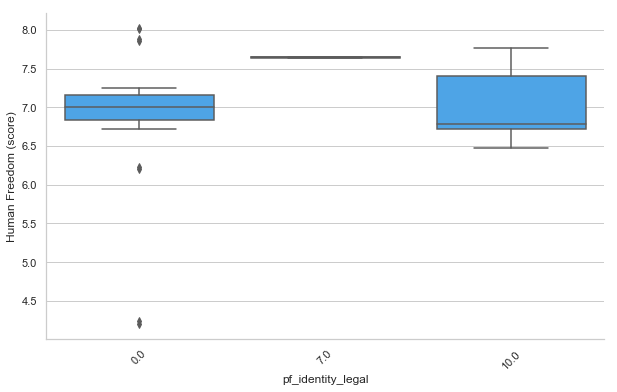

In [40]:
Latam_data = dataset[dataset['region'] == 'Latin America & the Caribbean'][important_cols]
Mundo_data = dataset[important_cols]

plt.figure(figsize=(10,6))
seaborn.boxplot(data=Latam_data,
                x='pf_identity_legal', y='hf_score',
                color=BLUE)
plt.ylabel('Human Freedom (score)')
plt.xlabel('pf_identity_legal')
plt.xticks(rotation=45)
seaborn.despine()


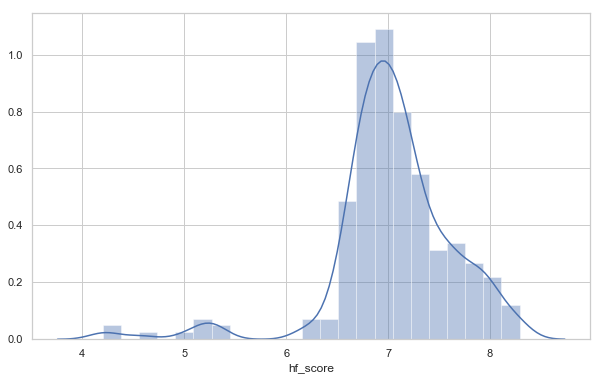

In [43]:
plt.figure(figsize=(10,6))
seaborn.distplot(Latam_data['hf_score'].dropna())

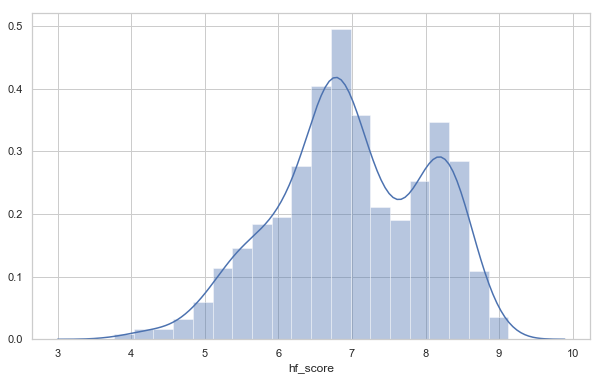

In [44]:
plt.figure(figsize=(10,6))
seaborn.distplot(Mundo_data['hf_score'].dropna())